# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from IPython.display import display

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv(r"C:\Users\ukasy\project ML\subbmission\Datasets_Clustering.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot              15000 non-null

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df['age'].value_counts().sort_index()

age
100.865    1
101.437    1
102.727    1
102.784    1
103.307    1
          ..
94.645     1
95.091     1
96.474     1
98.374     1
Mrz 63     1
Name: count, Length: 1906, dtype: int64

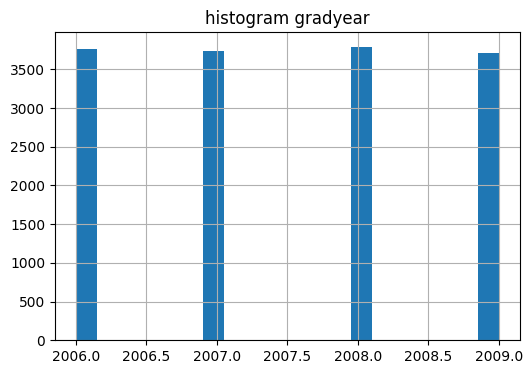

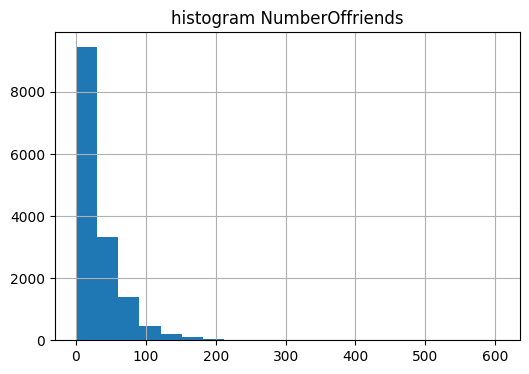

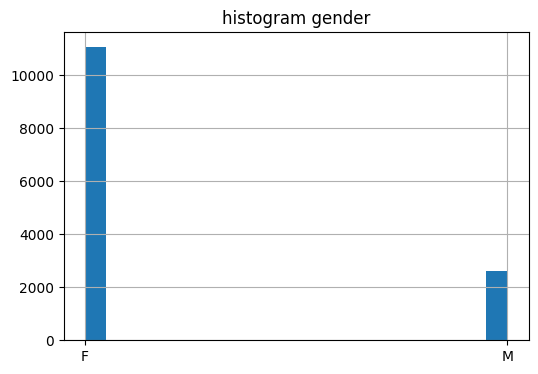

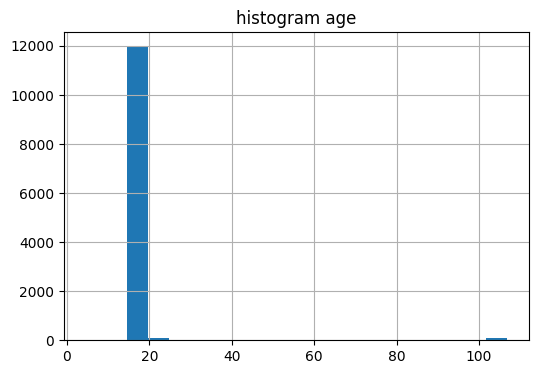

age
4.309      1
4.394      1
4.422      1
4.449      1
4.668      1
          ..
106.913    1
106.916    1
106.919    1
106.924    1
106.927    5
Name: count, Length: 1873, dtype: int64


In [5]:
data_num = ['gradyear', 'NumberOffriends', 'gender', 'age']
df['age']= df['age'].apply(pd.to_numeric,errors='coerce')

for cols in data_num :
    df[cols].hist(bins=20, figsize=(6,4))
    skew_cols = skew(df[cols])
    plt.title(f"histogram {cols}")
    plt.show()
    

print(df['age'].value_counts().sort_index())

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [6]:
# Duplicated data
df.duplicated().sum()

df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14720 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gradyear         14720 non-null  int64  
 1   gender           13581 non-null  object 
 2   age              12218 non-null  float64
 3   NumberOffriends  14720 non-null  int64  
 4   basketball       14720 non-null  int64  
 5   football         14720 non-null  int64  
 6   soccer           14720 non-null  int64  
 7   softball         14720 non-null  int64  
 8   volleyball       14720 non-null  int64  
 9   swimming         14720 non-null  int64  
 10  cheerleading     14720 non-null  int64  
 11  baseball         14720 non-null  int64  
 12  tennis           14720 non-null  int64  
 13  sports           14720 non-null  int64  
 14  cute             14720 non-null  int64  
 15  sex              14720 non-null  int64  
 16  sexy             14720 non-null  int64  
 17  hot              

In [7]:
# Missing values

prop_female = df['gender'].value_counts(normalize=True)['F']
prop_male = df['gender'].value_counts(normalize=True)['M']

nilai_tambahan = np.random.choice(['F', 'M'], size=df['gender'].isna().sum(), p=[prop_female,prop_male])
df['gender']= df['gender'].replace({None: nilai_tambahan})

df['gender'].value_counts()

# yg Age dihapus aj krna hanya sekitar 1500 dri 14k rows
df.dropna(inplace=True, axis=0)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12218 entries, 1 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gradyear         12218 non-null  int64  
 1   gender           12218 non-null  object 
 2   age              12218 non-null  float64
 3   NumberOffriends  12218 non-null  int64  
 4   basketball       12218 non-null  int64  
 5   football         12218 non-null  int64  
 6   soccer           12218 non-null  int64  
 7   softball         12218 non-null  int64  
 8   volleyball       12218 non-null  int64  
 9   swimming         12218 non-null  int64  
 10  cheerleading     12218 non-null  int64  
 11  baseball         12218 non-null  int64  
 12  tennis           12218 non-null  int64  
 13  sports           12218 non-null  int64  
 14  cute             12218 non-null  int64  
 15  sex              12218 non-null  int64  
 16  sexy             12218 non-null  int64  
 17  hot              

In [8]:
# Pengubahan Type data dari kategorikal ke numeric

df['gender']=df['gender'].replace({'F': 0,'M':1})
df.sample(5)

C:\Users\ukasy\AppData\Local\Temp\ipykernel_9040\512081451.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender']=df['gender'].replace({'F': 0,'M':1})


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
3413,2007,0,17.963,12,0,0,0,0,6,1,...,0,0,1,0,0,0,0,0,0,0
8205,2008,1,16.843,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6316,2007,0,18.155,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3069,2009,0,16.112,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4146,2008,0,16.537,6,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [9]:
# Penggabungan beberapa kata populer

columns = df.select_dtypes(include="number").columns.to_list()

print(columns)

categories = {
    'sports': ['basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'baseball', 'tennis', 'sports'],
    'entertainment': ['cheerleading', 'dance', 'band', 'marching', 'music', 'rock'],
    'religion': ['god', 'church', 'jesus', 'bible'],
    'fashion': ['hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister', 'abercrombie'],
    'negative': ['die', 'death', 'drunk', 'drugs'],
    'misc': ['cute', 'sex', 'sexy', 'hot', 'kissed']

}

for category, cols in categories.items():
    df[category] = df[cols].sum(axis=1)

list_cols_fix = ['sports', 'entertainment', 'religion', 'fashion', 'negative', 'misc']
list_cols_fix  = list_cols_fix + ['gradyear', 'gender', 'age', 'NumberOffriends']
df.sample(5)
print(list_cols_fix)
df = df[list_cols_fix]
df.info()

['gradyear', 'gender', 'age', 'NumberOffriends', 'basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']
['sports', 'entertainment', 'religion', 'fashion', 'negative', 'misc', 'gradyear', 'gender', 'age', 'NumberOffriends']
<class 'pandas.core.frame.DataFrame'>
Index: 12218 entries, 1 to 14999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sports           12218 non-null  int64  
 1   entertainment    12218 non-null  int64  
 2   religion         12218 non-null  int64  
 3   fashion          12218 non-null  int64  
 4   negative         12218 non-null  int64  
 5   misc             12218 non-null  int64

In [10]:
df.sample(10)

,sports,entertainment,religion,fashion,negative,misc,gradyear,gender,age,NumberOffriends
12760,0,10,2,0,1,0,2006,0,18.374,28
487,1,0,0,1,0,6,2009,0,15.118,31
14740,0,1,0,0,0,0,2009,1,15.896,6
11420,3,2,1,2,0,0,2006,0,19.359,34
8850,0,0,1,4,3,0,2007,0,17.804,43
1641,0,2,0,0,0,0,2006,0,18.721,16
4204,2,3,2,0,0,0,2007,1,17.807,23
6514,0,2,0,1,0,0,2008,0,16.745,0
12352,0,4,0,0,0,0,2006,0,18.992,0
1192,1,1,1,2,0,4,2009,0,16.761,140


skew sports = 2.912121601695029


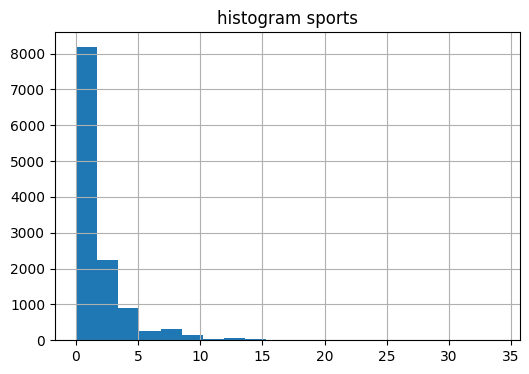

skew entertainment = 3.5511505326784385


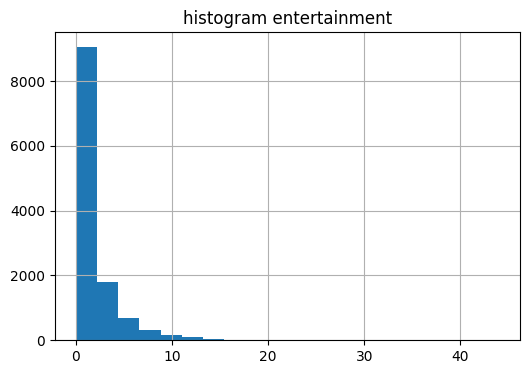

skew religion = 7.30849333064453


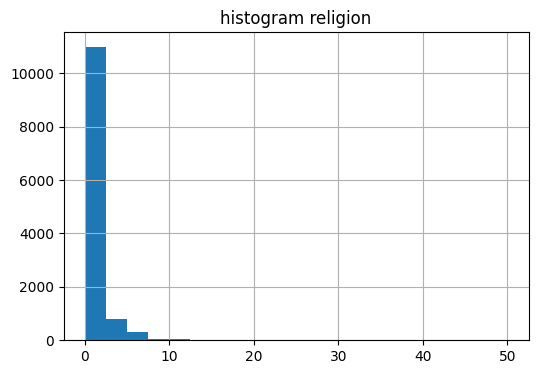

skew fashion = 54.18444036245342


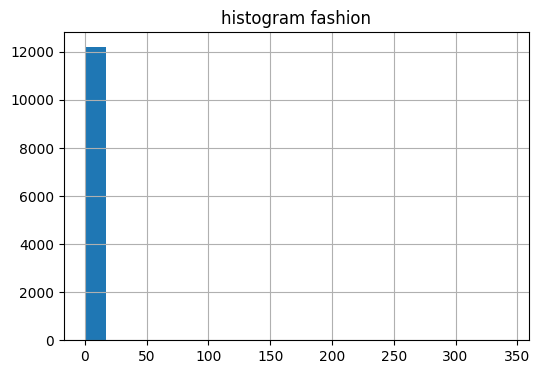

skew negative = 5.55526752148679


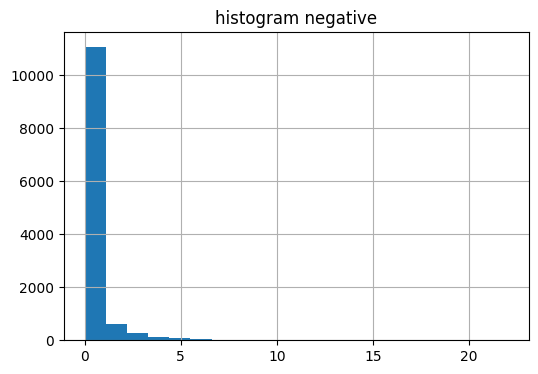

skew misc = 15.808322453925182


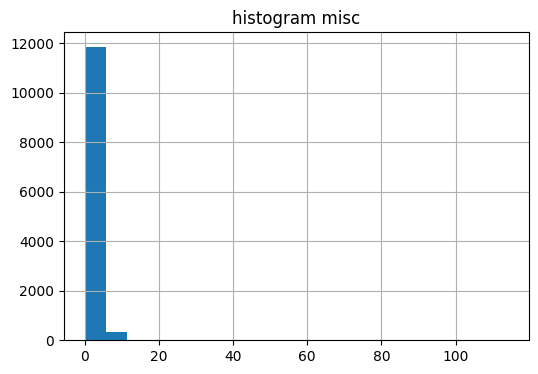

skew gradyear = 0.022611856884577255


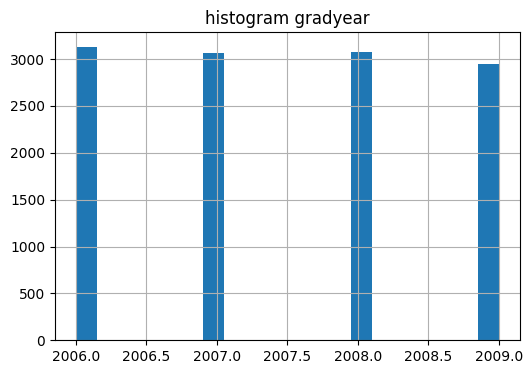

skew gender = 1.5618515672423088


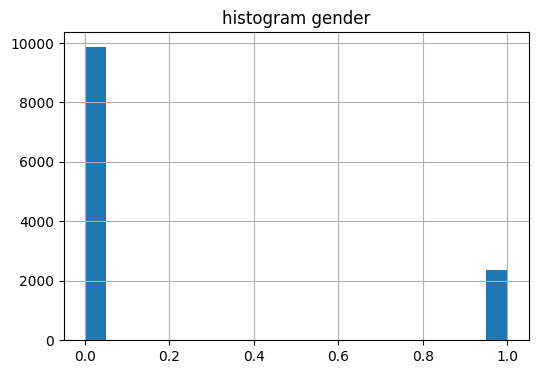

skew age = 10.500351057940144


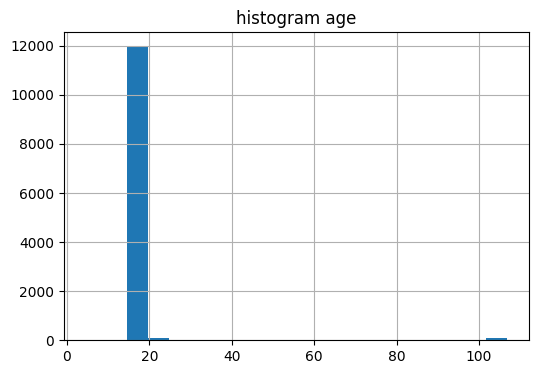

skew NumberOffriends = 2.805389703817277


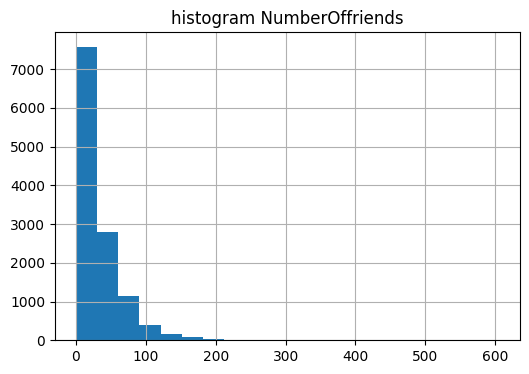

In [11]:
# Cek Distribusi Data

for cols in df.columns:
    df[cols].hist(bins=20, figsize=(6,4))
    skew_cols = skew(df[cols])
    plt.title(f"histogram {cols}")
    print(f"skew {cols} = {skew_cols}")
    plt.show()

In [12]:
# Karena data sangat skew kita menggunakan minmax scaler

scaler = MinMaxScaler()


df=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


df.head(5)


,sports,entertainment,religion,fashion,negative,misc,gradyear,gender,age,NumberOffriends
0,0.058824,0.000000,0.02,0.000000,0.045455,0.000000,0.333333,0.0,0.127668,0.080992
1,0.029412,0.068182,0.02,0.014620,0.090909,0.026316,0.333333,0.0,0.128652,0.067769
2,0.117647,0.022727,0.04,0.023392,0.000000,0.070175,0.666667,0.0,0.120330,0.001653
3,0.147059,0.068182,0.00,0.000000,0.000000,0.000000,0.666667,1.0,0.133748,0.052893
4,0.000000,0.000000,0.02,0.002924,0.000000,0.008772,0.000000,1.0,0.138582,0.029752


In [13]:
# Cek distribusi data setelah scaler

skew sports = 2.9121216016950284


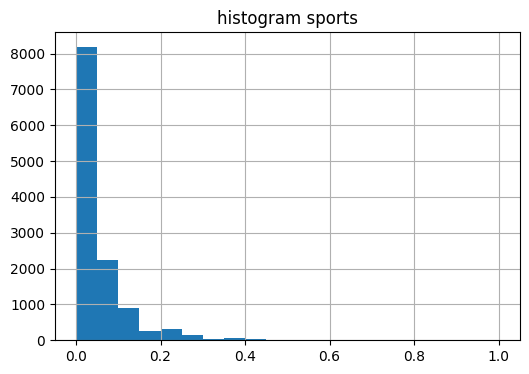

skew entertainment = 3.5511505326784367


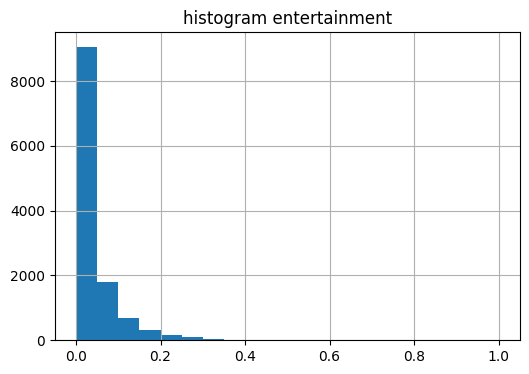

skew religion = 7.308493330644531


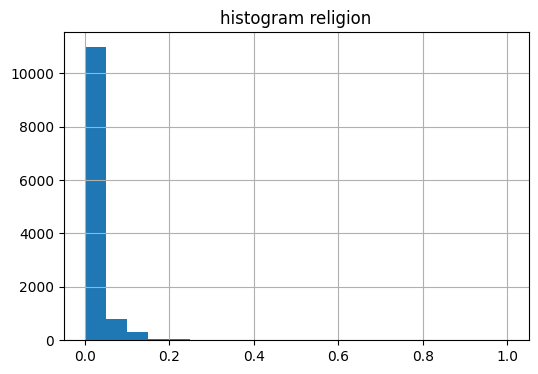

skew fashion = 54.18444036245341


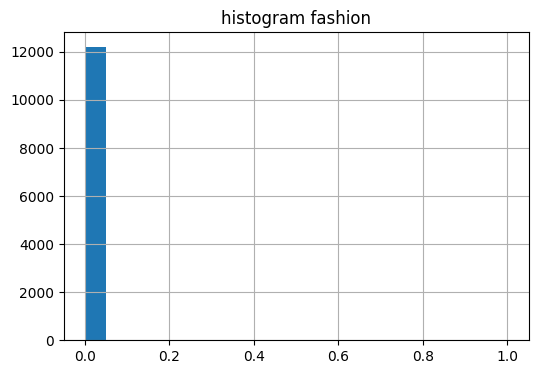

skew negative = 5.555267521486792


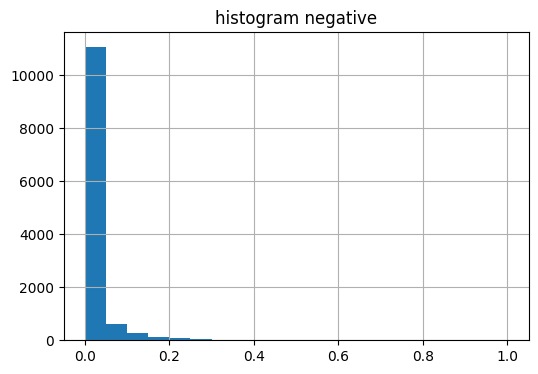

skew misc = 15.808322453925184


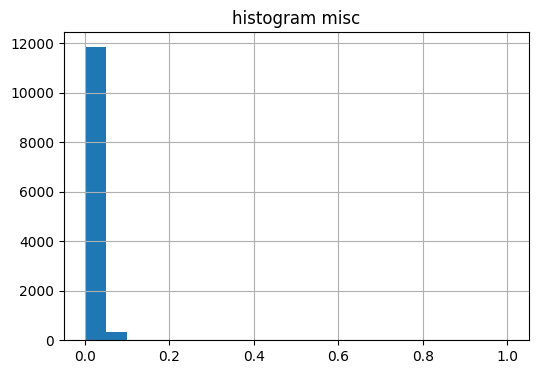

skew gradyear = 0.022611856884609323


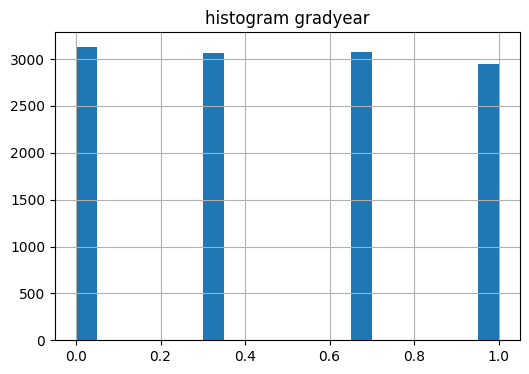

skew gender = 1.5618515672423088


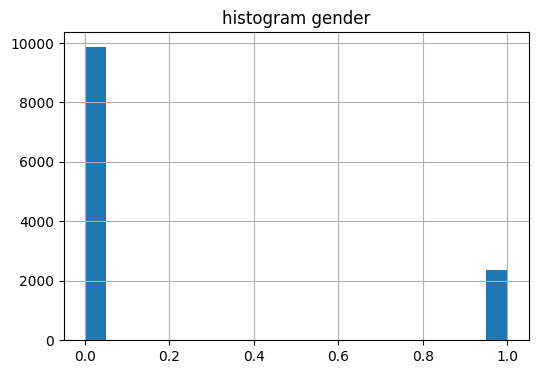

skew age = 10.500351057940144


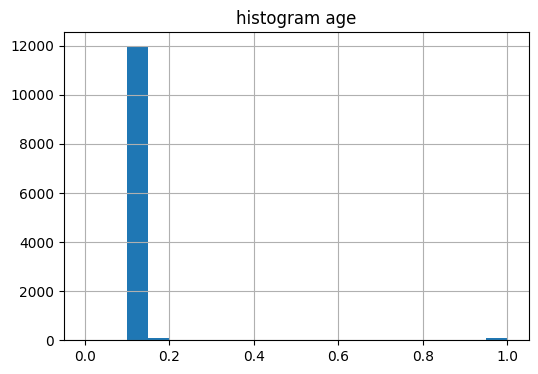

skew NumberOffriends = 2.805389703817277


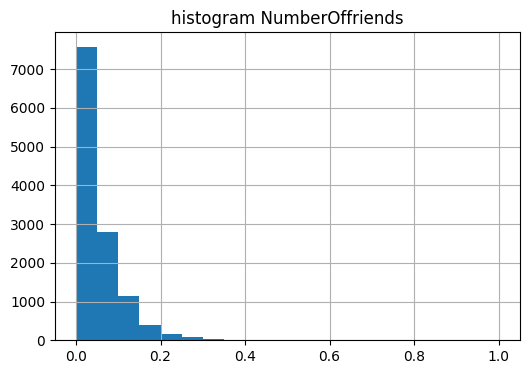

In [14]:
for cols in df.columns:
    df[cols].hist(bins=20, figsize=(6,4))
    skew_cols = skew(df[cols])
    plt.title(f"histogram {cols}")
    print(f"skew {cols} = {skew_cols}")
    plt.show()

Menggunakan Boxplot untuk melihat outlier

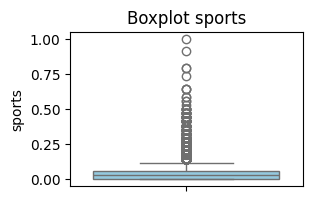

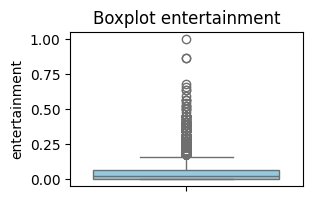

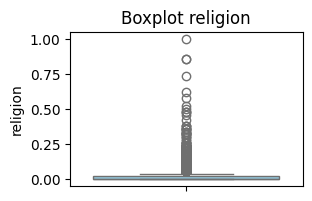

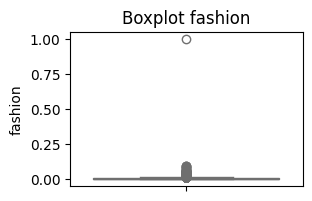

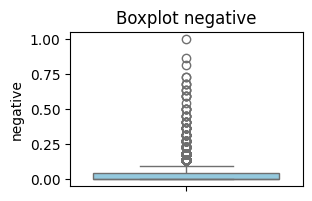

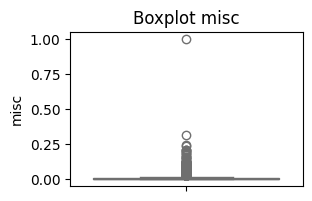

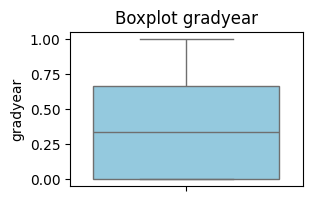

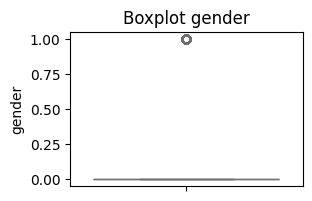

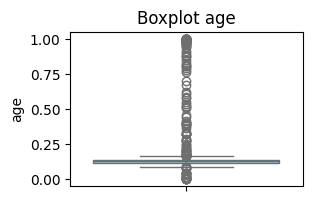

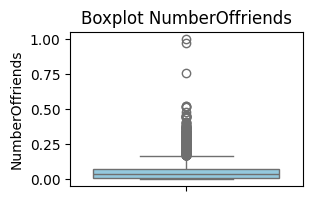

In [15]:
for column in df.columns:
    plt.figure(figsize=(3,2))
    sns.boxplot(df[column], color='skyblue')
    plt.title(f"Boxplot {column}")
    plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [16]:
Cluster = DBSCAN(eps=0.3, min_samples=5)

labels = Cluster.fit_predict(df)

df["labels"] = labels

df.head(10)

,sports,entertainment,religion,fashion,negative,misc,gradyear,gender,age,NumberOffriends,labels
0,0.058824,0.000000,0.02,0.000000,0.045455,0.000000,0.333333,0.0,0.127668,0.080992,0
1,0.029412,0.068182,0.02,0.014620,0.090909,0.026316,0.333333,0.0,0.128652,0.067769,0
2,0.117647,0.022727,0.04,0.023392,0.000000,0.070175,0.666667,0.0,0.120330,0.001653,1
3,0.147059,0.068182,0.00,0.000000,0.000000,0.000000,0.666667,1.0,0.133748,0.052893,2
4,0.000000,0.000000,0.02,0.002924,0.000000,0.008772,0.000000,1.0,0.138582,0.029752,3
5,0.029412,0.090909,0.08,0.000000,0.000000,0.017544,0.000000,0.0,0.144799,0.000000,4
6,0.000000,0.022727,0.00,0.000000,0.000000,0.008772,0.000000,0.0,0.138631,0.047934,4
7,0.000000,0.000000,0.00,0.002924,0.000000,0.000000,0.666667,1.0,0.122016,0.147107,2
8,0.323529,0.000000,0.00,0.000000,0.045455,0.000000,0.333333,0.0,0.130464,0.061157,0
9,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,1.000000,0.0,0.110965,0.161983,5


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [17]:
#Type your code here
df['labels'].value_counts()

filtered_labels = np.array(labels)
filtered_data = df[filtered_labels != -1]
filtered_labels = filtered_labels[filtered_labels != -1]

sil_score = silhouette_score(filtered_data.drop(columns=['labels']),filtered_labels)


print(f"silhouette_score = {sil_score}")

df.to_csv("Hasil_Clustering.csv", index=False)

silhouette_score = 0.5966152991842838


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [18]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

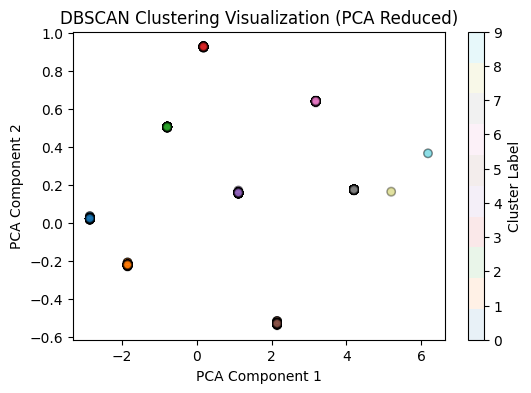

In [19]:
plt.figure(figsize=(6,4))

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(filtered_data)
scatter = plt.scatter(
                    x=reduced_data[:,0],
                    y= reduced_data[:,1],
                      c=filtered_labels,
                      cmap='tab10',
                      alpha=0.1,
                      edgecolors='k',)

plt.colorbar(label="Cluster Label")
plt.xlabel("PCA Component 1")  
plt.ylabel("PCA Component 2")  
plt.title("DBSCAN Clustering Visualization (PCA Reduced)")
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [20]:
df.info() #Sudah saya tambahkan labelnya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12218 entries, 0 to 12217
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sports           12218 non-null  float64
 1   entertainment    12218 non-null  float64
 2   religion         12218 non-null  float64
 3   fashion          12218 non-null  float64
 4   negative         12218 non-null  float64
 5   misc             12218 non-null  float64
 6   gradyear         12218 non-null  float64
 7   gender           12218 non-null  float64
 8   age              12218 non-null  float64
 9   NumberOffriends  12218 non-null  float64
 10  labels           12218 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.0 MB


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [21]:
df_normalized = df.drop(columns=['labels'])

df_normalized = pd.DataFrame(scaler.inverse_transform(df_normalized), columns=df_normalized.columns)
df_normalized.head(5)

,sports,entertainment,religion,fashion,negative,misc,gradyear,gender,age,NumberOffriends
0,2.0,0.0,1.0,0.0,1.0,0.0,2007.0,0.0,17.410,49.0
1,1.0,3.0,1.0,5.0,2.0,3.0,2007.0,0.0,17.511,41.0
2,4.0,1.0,2.0,8.0,0.0,8.0,2008.0,0.0,16.657,1.0
3,5.0,3.0,0.0,0.0,0.0,0.0,2008.0,1.0,18.034,32.0
4,0.0,0.0,1.0,1.0,0.0,1.0,2006.0,1.0,18.530,18.0


In [22]:
# Tambahkan lagi kolom labelsnya

df_normalized['labels']= df['labels']

df_normalized.head(5)

,sports,entertainment,religion,fashion,negative,misc,gradyear,gender,age,NumberOffriends,labels
0,2.0,0.0,1.0,0.0,1.0,0.0,2007.0,0.0,17.410,49.0,0
1,1.0,3.0,1.0,5.0,2.0,3.0,2007.0,0.0,17.511,41.0,0
2,4.0,1.0,2.0,8.0,0.0,8.0,2008.0,0.0,16.657,1.0,1
3,5.0,3.0,0.0,0.0,0.0,0.0,2008.0,1.0,18.034,32.0,2
4,0.0,0.0,1.0,1.0,0.0,1.0,2006.0,1.0,18.530,18.0,3


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [23]:
# Cluster 1
Cluster_1 = df_normalized[df_normalized['labels'] == 1]

Cluster_1_hobby = Cluster_1[['sports',	'entertainment',	'fashion',]].mean()
Cluster_1_Agama = Cluster_1[['religion']].mean()
Cluster_1_Negative = Cluster_1[['negative', 'misc']].mean()
Cluster_1_gender = Cluster_1[['gender']].mean()
Cluster_1_usia = Cluster_1[['age']].mean()

list_mean = [Cluster_1_hobby,Cluster_1_Agama,Cluster_1_Negative,Cluster_1_usia,Cluster_1_gender]

for i in list_mean:
    print(f"{i} \n\n")
    

sports           1.701706
entertainment    2.063864
fashion          1.919080
dtype: float64 


religion    0.86196
dtype: float64 


negative    0.458945
misc        1.087267
dtype: float64 


age    17.499966
dtype: float64 


gender    0.0
dtype: float64 




In [24]:
# CLuster 2
Cluster_2 = df_normalized[df_normalized['labels'] == 2]

Cluster_2_hobby = Cluster_2[['sports',	'entertainment',	'fashion',]].mean()
Cluster_2_Agama = Cluster_2[['religion']].mean()
Cluster_2_Negative = Cluster_2[['negative', 'misc']].mean()
Cluster_2_gender = Cluster_2[['gender']].mean()
Cluster_2_usia = Cluster_2[['age']].mean()

list_mean = [Cluster_2_hobby,Cluster_2_Agama,Cluster_2_Negative,Cluster_2_usia,Cluster_2_gender]

for i in list_mean:
    print(f"{i} \n\n")
    

sports           1.766667
entertainment    1.600000
fashion          0.698148
dtype: float64 


religion    0.885185
dtype: float64 


negative    0.427778
misc        0.564815
dtype: float64 


age    16.8994
dtype: float64 


gender    1.0
dtype: float64 




In [25]:
# Semua Claster (mean)

df['labels'].value_counts()
for i in range(0,9):
    Cluster = df_normalized[df['labels'] == i]
    mean = Cluster.mean()
    display(f"Cluster {i} = {mean} ")


'Cluster 0 = sports                1.432311\nentertainment         1.916564\nreligion              0.868303\nfashion               1.693661\nnegative              0.497751\nmisc                  1.049898\ngradyear           2007.000000\ngender                0.000000\nage                  18.391058\nNumberOffriends      32.102249\nlabels                0.000000\ndtype: float64 '

'Cluster 1 = sports                1.701706\nentertainment         2.063864\nreligion              0.861960\nfashion               1.919080\nnegative              0.458945\nmisc                  1.087267\ngradyear           2008.000000\ngender                0.000000\nage                  17.499966\nNumberOffriends      32.882190\nlabels                1.000000\ndtype: float64 '

'Cluster 2 = sports                1.766667\nentertainment         1.600000\nreligion              0.885185\nfashion               0.698148\nnegative              0.427778\nmisc                  0.564815\ngradyear           2008.000000\ngender                1.000000\nage                  16.899400\nNumberOffriends      23.877778\nlabels                2.000000\ndtype: float64 '

'Cluster 3 = sports                1.419170\nentertainment         1.575107\nreligion              0.725322\nfashion               0.479256\nnegative              0.399142\nmisc                  0.404864\ngradyear           2006.000000\ngender                1.000000\nage                  18.802356\nNumberOffriends      24.221745\nlabels                3.000000\ndtype: float64 '

'Cluster 4 = sports                1.168595\nentertainment         1.770661\nreligion              0.885124\nfashion               1.510744\nnegative              0.439669\nmisc                  0.866116\ngradyear           2006.000000\ngender                0.000000\nage                  18.963934\nNumberOffriends      26.561157\nlabels                4.000000\ndtype: float64 '

'Cluster 5 = sports                1.788002\nentertainment         2.177544\nreligion              0.871099\nfashion               2.070531\nnegative              0.464126\nmisc                  1.087961\ngradyear           2009.000000\ngender                0.000000\nage                  16.846861\nNumberOffriends      35.336036\nlabels                5.000000\ndtype: float64 '

'Cluster 6 = sports                1.685246\nentertainment         1.577049\nreligion              0.721311\nfashion               0.611475\nnegative              0.419672\nmisc                  0.373770\ngradyear           2007.000000\ngender                1.000000\nage                  17.872590\nNumberOffriends      25.983607\nlabels                6.000000\ndtype: float64 '

'Cluster 7 = sports                1.942675\nentertainment         1.439490\nreligion              0.692144\nfashion               0.577495\nnegative              0.312102\nmisc                  0.469214\ngradyear           2009.000000\ngender                1.000000\nage                  15.981975\nNumberOffriends      24.900212\nlabels                7.000000\ndtype: float64 '

'Cluster 8 = sports                1.0000\nentertainment         0.8000\nreligion              0.4000\nfashion               0.8000\nnegative              0.0000\nmisc                  0.4000\ngradyear           2009.0000\ngender                1.0000\nage                 104.7978\nNumberOffriends      65.8000\nlabels                8.0000\ndtype: float64 '

In [26]:
df['labels'].value_counts()

labels
 1    2521
 5    2467
 0    2445
 4    2420
 3     699
 6     610
 2     540
 7     471
-1      34
 9       6
 8       5
Name: count, dtype: int64

Tulis hasil interpretasinya di sini.
1. Cluster 0:
sosial  : sangat Baik (rata-rata teman 32)
usia    : 18-19 tahun (Genz)
Grad    : 2007
Mereka lebih tertarik ke entertainment
Agama   : mereka lumyan shalih2 (0.8 nilainya)
Gender  : Kebanyakan wanita
jumlah  : 2439
1. Cluster 1:
sosial  : sangat Baik (rata-rata teman 33)
usia    : 17-18 tahun (Genz)
Grad    : 2008
Mereka lebih tertarik ke entertainment
Agama   : mereka lumyan shalih2 (0.8 nilainya)
Gender  : Kebanyakan wanita
jumlah  : 2512
2. Cluster 2:
sosial  : Baik (rata-rata teman 24)
usia    : 16-17 tahun (Genz)
Grad    : 2008
Mereka lebih tertarik ke sport
Agama   : Baik (0.8 nilainya)
Gender  : Kebanyakan Pria
jumlah  : 548

4. Cluster 3:
sosial  : Baik (rata-rata teman 24)
usia    : 18-19 tahun (Genz)
Grad    : 2006
Mereka lebih tertarik ke sport dan entertainment (keduanya tidak jauh beda)
Agama   : Lumyan Baik (0.7 nilainya)
Gender  : Kebanyakan Pria
jumlah  : 708

5. Cluster 4:
sosial  : Baik (rata-rata teman 26)
usia    : 19 tahun (Genz)
Grad    : 2006
Mereka lebih tertarik ke entertainmen
Agama   : Baik (0.8 nilainya)
Gender  : Kebanyakan Wanita
jumlah  : 2412

6. Cluster 5:
sosial  :  Sangat Baik (rata-rata teman 35)
usia    : 16-17 tahun (Genz)
Grad    : 2009
Mereka lebih tertarik ke fashion dan entertainmet (kedua nya sangat tinggi dan tidak jauh berbeda)
Agama   : Baik (0.8 nilainya)
Gender  : Kebanyakan Wanita
jumlah  : 2466
7. cluster 6: 
sosial  :  Baik (rata-rata teman 25)
usia    : 17-18 tahun (Genz)
Grad    : 2007
Mereka lebih tertarik ke sport dan entertainmet (kedua nya sangat tinggi dan tidak jauh berbeda)
Agama   : kurang baik (0.6 nilainya)
Gender  : Kebanyakan Pria
jumlah  : 471
8. Untuk cluster 7 dan 8 bisa kita anggap sbg noise krna jumlah cluster yg sangat kecil (hanya 6)

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_normalized.to_csv("Datasets_Klasifikasi.csv", index=False)